# Data Preprocessing and Visualization Final Project
### City Hospital – Data Preprocessing & Exploratory Analysis

### Description (From Project Desctiption file): 

In today’s healthcare scene, patient care and satisfaction are vital. Hospitals must continuously seek ways to differentiate themselves and understand patient needs. Therefore, City Hospital, which provides services across multiple departments, aims to leverage the data collected by its information systems to enhance patient care and operational efficiency.

The data available represents patient interactions and treatments across various departments, reflecting the hospital’s overall performance and patient demographics. To harness this data effectively, City Hospital’s management has assembled a team of data scientists to analyze and segment patient information. Within this team, there is a dedicated subgroup focused on data preprocessing (DP Team).

The DP Team’s role is to prepare the data for advanced analytical methods and provide initial insights into hospital operations and patient care patterns. This is crucial as the hospital currently lacks comprehensive information on its activities and patient behaviors.

City Hospital requires an exploratory analysis to address fundamental operational questions and an analytic-based table (ABT) for descriptive analysis and patient segmentation. Essentially, we are the Data Preprocessing (DP) Team inside City Hospital’s Data Science group. Our job is not to build predictive models yet, our tasks are utilizing data from the hospital’s information systems to create an ABT, which will then be handed over to the next team for further analysis and implementation.

### Part A – Data Understanding & Cleaning. 
To work with data, we first need to import all required files and libraries as well as understand what data set we are dealing with and what transformations should be done to make this data useful.

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install openpyxl                  
#!pip install squarify                
#!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('Data/Project Data.xlsx')
df.head(5)


,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


#### Part A-1 (Handling missing and repeating values)
To clean data from outliers and invalid inputs, we first need to remove all missing and repeating values to ensure that the data set is complete and ready for further preprocessing.

In [4]:
df.isnull().sum() # Shows how many missing values are in each column

Patient ID                      0
Age                            56
Gender                          0
City of Residence               0
Profession                      0
Insurance Provider           1910
Family History               1993
Education Level                29
Marital Status                  0
Visit Date                      0
Department                      0
Consultation Duration           0
Satisfaction Level              0
Approximate Annual Income     154
Consultation Price              0
Insurance Coverage             50
dtype: int64

In [5]:
df.isnull().sum().sum() # Shows the amount of missing values in the whole data frame

np.int64(4192)

In [6]:
df.duplicated().sum() # Check for duplicates 

np.int64(8)

In [7]:
def missing_summary(data_frame): # Function that shows how many missing values we have in the data frame
    missing_count = data_frame.isna().sum() # Counts how many missing missing values we have in our data frame
    missing_percent = (data_frame.isna().mean() * 100).round(2) # Creates a percentage value of missing_count
    missing_summary_df = pd.DataFrame({"Missing_Count": missing_count, "Missing_%": missing_percent}).sort_values(by="Missing_%", ascending=False) # Creates a sorted data frame with missing_count and missing percent

    print(missing_summary_df.sort_values(by="Missing_%", ascending=False))
missing_summary(df)

                           Missing_Count  Missing_%
Family History                      1993      19.91
Insurance Provider                  1910      19.08
Approximate Annual Income            154       1.54
Age                                   56       0.56
Insurance Coverage                    50       0.50
Education Level                       29       0.29
City of Residence                      0       0.00
Gender                                 0       0.00
Profession                             0       0.00
Patient ID                             0       0.00
Marital Status                         0       0.00
Visit Date                             0       0.00
Consultation Duration                  0       0.00
Department                             0       0.00
Satisfaction Level                     0       0.00
Consultation Price                     0       0.00


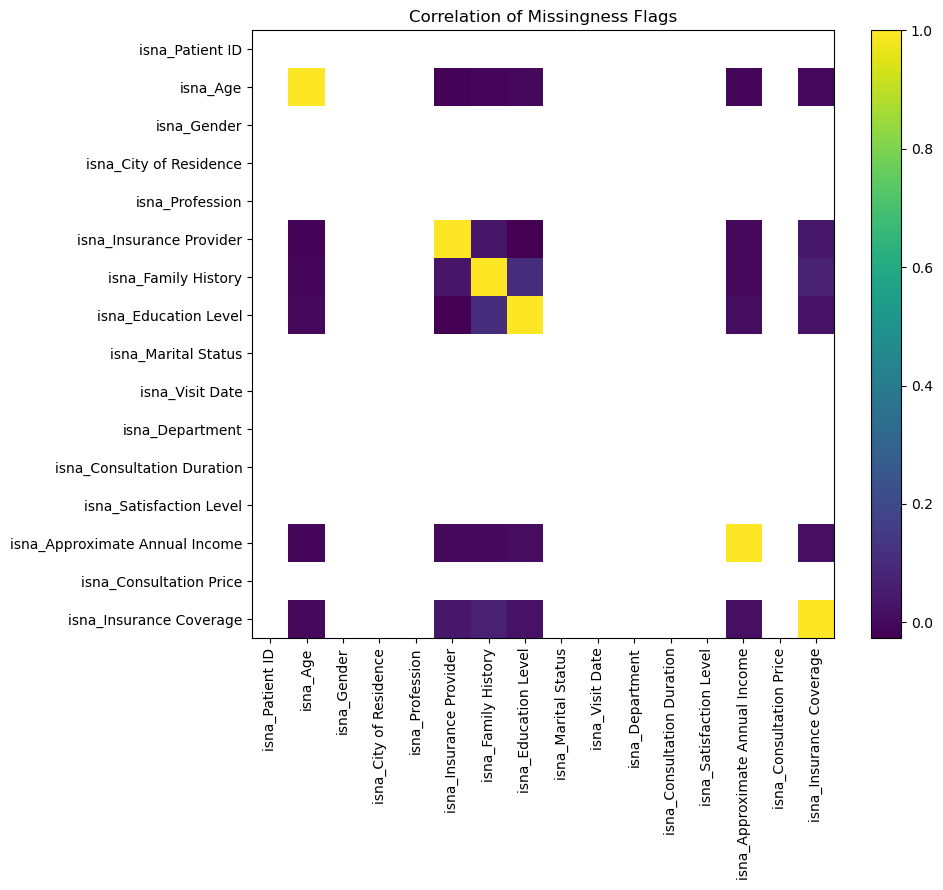

In [8]:
# Creates per-column missingness flags (1 if NaN else 0) to inspect pattern correlations
missing_flags = df.isna().astype(int).add_prefix("isna_")

# Computes the correlation of missingness flags to see if missing patterns co-occur
corr_flags = missing_flags.corr()

# Visualize the correlation matrix of missingness flags
plt.figure(figsize=(10, 9))
plt.imshow(corr_flags.values, aspect='auto', interpolation='nearest')
plt.xticks(range(len(corr_flags.columns)), corr_flags.columns, rotation=90)
plt.yticks(range(len(corr_flags.index)), corr_flags.index)
plt.title("Correlation of Missingness Flags")
plt.colorbar()
plt.tight_layout()
plt.show()

We can see that in our data there are 4192 missing values. Most of them belong to the two columns 'Family History' and 'Insurance Provider' (1993 and 1910, respectively).

From the 'Correlation of missing flags' heatmap we can see that there is almost no correlation between missing values, so these missing values do NOT create any bias.

In [9]:
# Replace None in the non-number columns with a consistent label 'Missing'
for col in df.select_dtypes(exclude=['number']).columns:
    df[col] = df[col].replace([None], "Missing")
missing_summary(df)

                           Missing_Count  Missing_%
Approximate Annual Income            154       1.54
Age                                   56       0.56
Insurance Coverage                    50       0.50
Patient ID                             0       0.00
Profession                             0       0.00
Insurance Provider                     0       0.00
Gender                                 0       0.00
City of Residence                      0       0.00
Education Level                        0       0.00
Family History                         0       0.00
Marital Status                         0       0.00
Visit Date                             0       0.00
Consultation Duration                  0       0.00
Department                             0       0.00
Satisfaction Level                     0       0.00
Consultation Price                     0       0.00


#### Part A-1.1 (Child/Adult Conflict Resolution)

We detect rows where child indicators (Age < 18 AND child education level) conflict with adult indicators (professional job, married status). These are fixed by setting the adult indicators to child-appropriate values.


In [10]:
# Define child education levels
child_education = ['Pre-school', 'Kindergarten', 'Elementary school', 'Middle school/junior high']

# Define invalid professions and marital statuses for children
invalid_child_professions = ['Doctor', 'Engineer', 'Lawyer', 'Accountant', 'Manager', 
                             'Nurse', 'Teacher', 'Consultant', 'Analyst', 'Retired']
invalid_child_marital = ['Married', 'Divorced', 'Widowed']

# Find rows where BOTH Age < 18 AND child education (AND logic)
child_mask = (df['Age'] < 18) & (df['Education Level'].isin(child_education))

# Fix 1: Invalid professions for children -> Student
profession_conflict = child_mask & df['Profession'].isin(invalid_child_professions)
print(f"Children with invalid professions: {profession_conflict.sum()}")
df.loc[profession_conflict, 'Profession'] = 'Student'

# Fix 2: Invalid marital status for children -> Single
marital_conflict = child_mask & df['Marital Status'].isin(invalid_child_marital)
print(f"Children with invalid marital status: {marital_conflict.sum()}")
df.loc[marital_conflict, 'Marital Status'] = 'Single'

print(f"Total conflicts fixed: {profession_conflict.sum() + marital_conflict.sum()}")


Children with invalid professions: 109
Children with invalid marital status: 5
Total conflicts fixed: 114


#### Part A-1.2 (Insurance Provider/Coverage Consistency)

Rows with Insurance Coverage > 0 but no Insurance Provider are fixed by setting Provider to 'Unknown' (trusting the coverage values).


In [11]:
missing_provider = (df['Insurance Provider'] == 'Missing') # Rows where provider is missing (we previously filled NaN -> 'Missing')
has_coverage = df['Insurance Coverage'] > 0 # Rows where insurance actually paid something

provider_conflict = missing_provider & has_coverage # Conflict: no provider name, but money was received -> insurance definitely existed

print(f"Rows with no provider but coverage > 0: {provider_conflict.sum()}")
if provider_conflict.sum() > 0:
    df.loc[provider_conflict, 'Insurance Provider'] = 'Unknown'
    print(f"Fixed {provider_conflict.sum()} rows (Insurance Provider -> 'Unknown')")


Rows with no provider but coverage > 0: 92
Fixed 92 rows (Insurance Provider -> 'Unknown')


#### Part A-1.3 (KNN Imputation for Missing Numeric Values)

We use KNN Imputation which leverages multiple features to predict missing values more accurately than simple mean or median approaches.


In [12]:
# KNN Imputation for missing numeric values

numeric_cols_for_knn = ['Age', 'Approximate Annual Income', 'Insurance Coverage',
                        'Consultation Price', 'Consultation Duration']

print("Missing values before KNN:")
print(df[numeric_cols_for_knn].isna().sum())

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols_for_knn] = imputer.fit_transform(df[numeric_cols_for_knn])

print("\nMissing values after KNN:")
print(df[numeric_cols_for_knn].isna().sum())
missing_summary(df)


Missing values before KNN:
Age                           56
Approximate Annual Income    154
Insurance Coverage            50
Consultation Price             0
Consultation Duration          0
dtype: int64

Missing values after KNN:
Age                          0
Approximate Annual Income    0
Insurance Coverage           0
Consultation Price           0
Consultation Duration        0
dtype: int64
                           Missing_Count  Missing_%
Patient ID                             0        0.0
Age                                    0        0.0
Gender                                 0        0.0
City of Residence                      0        0.0
Profession                             0        0.0
Insurance Provider                     0        0.0
Family History                         0        0.0
Education Level                        0        0.0
Marital Status                         0        0.0
Visit Date                             0        0.0
Department                  

#### Part A-1.4 (Age Outlier Handling with KNN + Typo Validation)

For ages > 117, we use KNN prediction to validate potential typos. If KNN predicts an age close to (original - 100), we confirm it's a typo and correct it. Otherwise, we use the KNN prediction directly.


In [13]:
# KNN + Typo Validation for Age Outliers > 117

age_outlier_mask = df['Age'] > 117
outlier_count = age_outlier_mask.sum()
print(f"Found {outlier_count} ages > 117")

if outlier_count > 0:
    original_outlier_ages = df.loc[age_outlier_mask, 'Age'].copy()
    
    # Create temp dataframe with outlier ages set to NaN
    df_temp = df.copy()
    df_temp.loc[age_outlier_mask, 'Age'] = np.nan
    
    # KNN impute to predict expected ages
    imputer_age = KNNImputer(n_neighbors=5)
    df_temp[numeric_cols_for_knn] = imputer_age.fit_transform(df_temp[numeric_cols_for_knn])
    knn_predictions = df_temp.loc[age_outlier_mask, 'Age']
    
    # Compare KNN prediction vs (original - 100)
    tolerance = 10  # years
    typo_confirmed = 0
    knn_used = 0
    
    for idx in original_outlier_ages.index:
        original = original_outlier_ages[idx]
        knn_pred = knn_predictions[idx]
        typo_corrected = original - 100
        
        if abs(knn_pred - typo_corrected) <= tolerance:
            df.loc[idx, 'Age'] = typo_corrected
            typo_confirmed += 1
        else:
            df.loc[idx, 'Age'] = round(knn_pred)
            knn_used += 1
    
    print(f"Typo confirmed (used original-100): {typo_confirmed}")
    print(f"KNN prediction used: {knn_used}")


Found 103 ages > 117
Typo confirmed (used original-100): 45
KNN prediction used: 58


#### Part A-2 (Handling outliers with Modified Z-Score)

We use Modified Z-Score for outlier detection. This method is robust to extreme outliers because it uses median and MAD (Median Absolute Deviation) rather than mean and standard deviation, making it less sensitive to the outliers themselves.


In [14]:
# Modified Z-Score function for outlier detection

def modified_zscore_outliers(x, threshold=3.5):
    """
    Detect outliers using Modified Z-Score.
    
    Parameters
    ----------
    x : array-like data

    threshold : float, default 3.5
    Common values: 3.5 (standard), 3.0 (stricter), 5.0 (lenient)
    
    Returns
    -------
    boolean mask (True = outlier)
    """

    x = np.array(x)
    median = np.nanmedian(x)
    mad = np.nanmedian(np.abs(x - median)) # Median Absolute Deviation

    # Edge case: all values are identical -> no outliers

    if mad == 0:
        # Fallback: use mean absolute deviation scaled to match MAD under normality
        mad = np.nanmean(np.abs(x - median)) * 1.253314
    if mad == 0:
        return np.zeros(len(x), dtype=bool)
    
    modified_z = 0.6745 * (x - median) / mad # 0.6745 = inverse of 0.75 quantile
    return np.abs(modified_z) > threshold

def handle_outliers_modified_zscore(df, column, method="bounds", threshold=3.5, treat_zero_as_valid=False):
    """
    Detect and handle outliers in a column using Modified Z-Score.
    
    Parameters
    ----------
    df : pandas.DataFrame
    column : str
        Column name to clean
    method : {"bounds", "drop"}, default "bounds"
        "bounds" → cap values at 1st and 99th percentile of non-outliers
        "drop"  → remove rows 
    threshold : float
        Modified Z-Score cutoff
    treat_zero_as_valid : bool
        If True, zeros are never treated as outliers
    
    Returns:
    count : int number of outliers detected
    """
    x = df[column].values.copy()
    
    # Show boxplot before
    plt.figure(figsize=(8, 1.8))
    plt.boxplot(pd.Series(x).dropna(), vert=False, showfliers=True)
    plt.title(f"Boxplot before ({column})")
    plt.show()
    
    # Detect outliers 
    outliers = modified_zscore_outliers(x, threshold)
    if treat_zero_as_valid:
        outliers = outliers & (x != 0)
    
    count = outliers.sum()
    print(f"\nDetected outliers in {column} (Modified Z-Score): {count}")
    
    # Apply chosen method
    if method == "bounds" and count > 0:
        non_outlier_data = x[~outliers & ~np.isnan(x)]
        if len(non_outlier_data) > 0:
            lower_bound = np.percentile(non_outlier_data, 1)
            upper_bound = np.percentile(non_outlier_data, 99)
            df.loc[df[column] < lower_bound, column] = lower_bound
            df.loc[df[column] > upper_bound, column] = upper_bound
    
    # Show boxplot after
    plt.figure(figsize=(8, 1.8))
    plt.boxplot(df[column].dropna(), vert=False, showfliers=True)
    plt.title(f"Boxplot after ({column})")
    plt.show()
    return count


Applying Modified Z-Score outlier handling...

--- Age ---


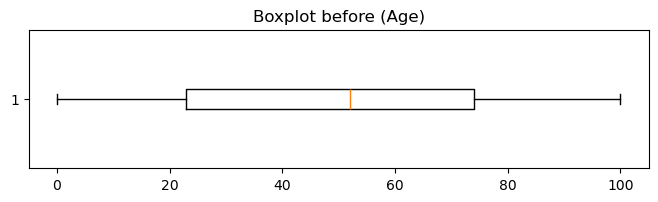


Detected outliers in Age (Modified Z-Score): 0


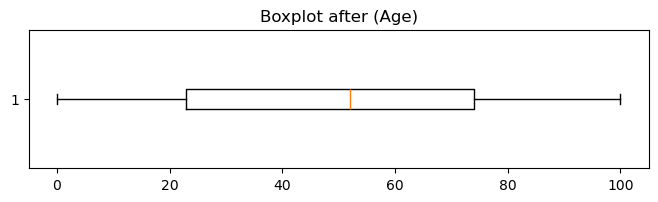


--- Consultation Duration ---


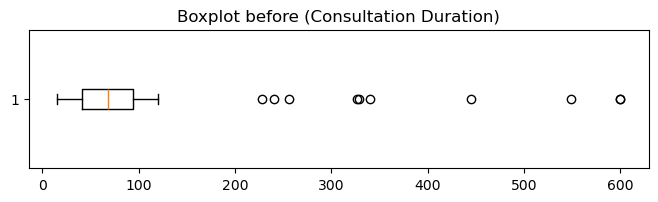


Detected outliers in Consultation Duration (Modified Z-Score): 10


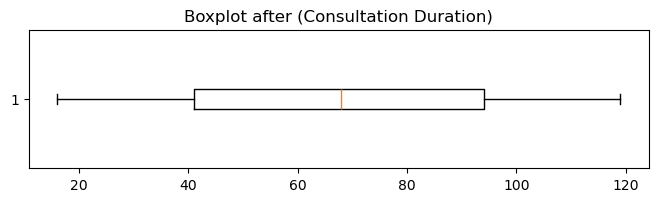


--- Approximate Annual Income ---


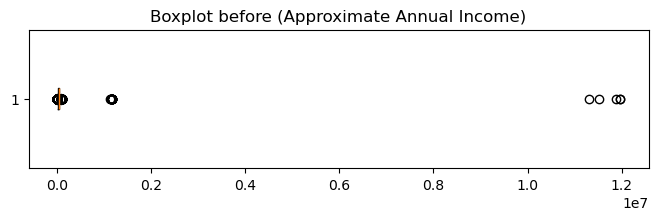


Detected outliers in Approximate Annual Income (Modified Z-Score): 78


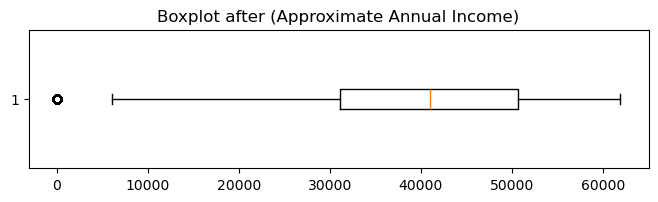


--- Consultation Price ---


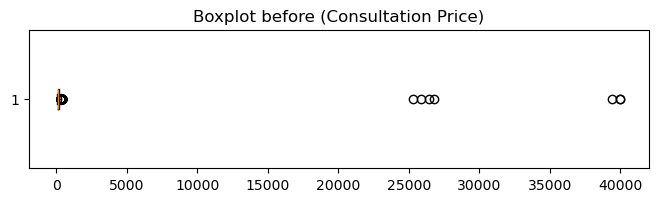


Detected outliers in Consultation Price (Modified Z-Score): 8


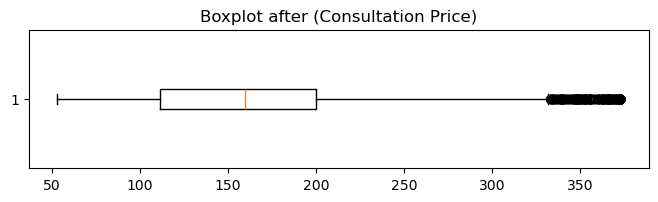


--- Insurance Coverage ---


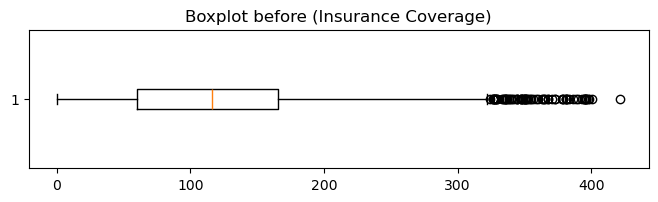


Detected outliers in Insurance Coverage (Modified Z-Score): 12


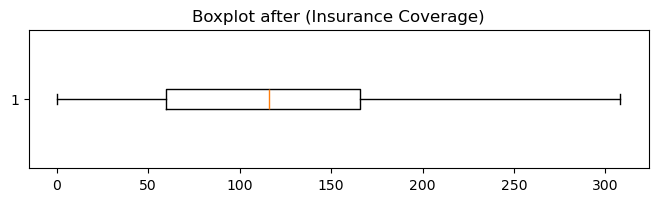

np.int64(12)

In [15]:
# Apply Modified Z-Score outlier handling to all numeric columns
print("Applying Modified Z-Score outlier handling...")

print("\n--- Age ---")
handle_outliers_modified_zscore(df, 'Age', 'bounds', threshold=3.5)

print("\n--- Consultation Duration ---")
handle_outliers_modified_zscore(df, 'Consultation Duration', 'bounds', threshold=3.5)

print("\n--- Approximate Annual Income ---")
handle_outliers_modified_zscore(df, 'Approximate Annual Income', 'bounds', threshold=3.5)

print("\n--- Consultation Price ---")
handle_outliers_modified_zscore(df, 'Consultation Price', 'bounds', threshold=3.5, treat_zero_as_valid=True)

print("\n--- Insurance Coverage ---")
handle_outliers_modified_zscore(df, 'Insurance Coverage', 'bounds', threshold=3.5, treat_zero_as_valid=True)


In [16]:
# Cap Satisfaction Level at 5
print('Satisfaction Levels before editing:', np.sort(df['Satisfaction Level'].unique()))
df.loc[df['Satisfaction Level'] > 5, 'Satisfaction Level'] = 5
print('Satisfaction Levels after editing:', np.sort(df['Satisfaction Level'].unique()))


Satisfaction Levels before editing: [1 2 3 4 5 6]
Satisfaction Levels after editing: [1 2 3 4 5]


### Part B — Feature Engineering & Analytical Base Table (ABT) Construction

To prepare the dataset for future modeling tasks, we construct an Analytical Base Table (ABT) that consolidates all relevant patient information into a structured, model-ready format. The ABT integrates multiple types of features derived from the raw visit-level data, ensuring that each patient is represented by a single, comprehensive record.

#### Part B-1 (Feature Engineering)

First we need to prepare data for future ABT and create all required columns.

In [17]:
# Sorting the data frame
df = df.sort_values(by=['Patient ID', 'Visit Date']) 
# Creating multyindex 
df['Visit Number'] = df.groupby('Patient ID').cumcount()  
# Setting the index
df_multi = df.set_index(['Patient ID', 'Visit Number'])


Static attributes (demographics):

In [18]:
# List of static columns    
static_cols = [
    'Age', 'Gender', 'City of Residence', 'Profession', 
    'Insurance Provider', 'Family History', 'Education Level', 'Marital Status'
]

# Group the data by Patient ID and take the **last value** for each patient
# Using .last() because static features usually do not change often
static_df = df_multi.groupby('Patient ID')[static_cols].last()


Aggregated numeric features:

In [19]:
# Define aggregation operations for numeric columns
agg_dict = {
    'Approximate Annual Income': ['mean'],                   # average Approximate Annual Income
    'Consultation Duration': ['sum', 'mean', 'max', 'min'],  # total, average, max, min Consultation Duration
    'Satisfaction Level': ['mean', 'min', 'max'],            # average, min, max Satisfaction Level
    'Consultation Price': ['sum', 'mean', 'max', 'min'],     # total, average, max, min Consultation Price
    'Insurance Coverage': ['sum', 'mean']                    # total and average Insurance Coverage
}

# Group by Patient ID and apply the aggregation
numeric_df = df_multi.groupby('Patient ID').agg(agg_dict)

# Simplify MultiIndex columns into single level with descriptive names
numeric_df.columns = ['_'.join(col).strip() for col in numeric_df.columns.values]

Activity and Recency:

In [20]:
# Reset index so 'Visit Number' is a regular column again
df_reset = df_multi.reset_index()

# Aggregate activity information per patient
activity_df = df_reset.groupby('Patient ID').agg(
    Number_of_Visits=('Visit Number', 'count'),       # total number of visits
    First_Visit_Date=('Visit Date', 'min'),           # date of first visit
    Last_Visit_Date=('Visit Date', 'max')             # date of most recent visit
)

Departments and Services:

In [21]:
# Count how many unique departments each patient has visited
dept_df = df_reset.groupby('Patient ID').agg(
    Departments_Visited=('Department', pd.Series.nunique))

#### Part B-2 (ABT Construction)
After we created all required columns we can join them together to obtain ABT.

In [22]:
abt = static_df.join([numeric_df, activity_df, dept_df])
abt.head()

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Approximate Annual Income_mean,Consultation Duration_sum,...,Consultation Price_sum,Consultation Price_mean,Consultation Price_max,Consultation Price_min,Insurance Coverage_sum,Insurance Coverage_mean,Number_of_Visits,First_Visit_Date,Last_Visit_Date,Departments_Visited
Patient ID,,,,,,,,,,,,,,,,,,,,,
1000,83.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,43667.250000,1314.0,...,3495.606517,174.780326,372.794488,68.217779,3431.003200,171.550160,20,2024-01-01,2024-06-27,10
1001,55.0,Male,Liverpool,Lawyer,Provider C,Heart Disease,Undergraduate,Married,44214.437500,968.0,...,2396.985814,149.811613,286.493059,53.783761,1677.890070,104.868129,16,2024-01-02,2024-06-27,10
1002,10.0,Female,Liverpool,Student,Provider C,Cancer,Elementary school,Single,526.766667,1279.0,...,2919.254806,162.180823,279.350826,66.894396,2043.478364,113.526576,18,2024-01-06,2024-06-23,10
1003,91.0,Male,Manchester,Retired,Provider A,Cancer,Master,Married,42379.768000,1536.0,...,4483.683146,179.347326,372.794488,52.622319,3588.890652,143.555626,25,2024-01-03,2024-06-29,11
1004,11.0,Male,Glasgow,Student,Provider B,Cancer,Middle school/junior high,Single,0.000000,1630.0,...,4486.939214,172.574585,304.869616,52.622319,4037.528377,155.289553,26,2024-01-01,2024-06-28,9


#### Part B-3 (Optimization)
After we created abt with all valid values, we can change the data types of our columns so the dataset will be lighter and more memory-efficient, which will speed up computations and reduce resource usage during future analysis.

In [23]:
abt = abt.astype({
    'Age': 'int8',
    'Gender':'category',
    'City of Residence': 'category',
    'Profession': 'category',
    'Insurance Provider': 'category',
    'Family History': 'category',
    'Education Level': 'category',
    'Marital Status': 'category',
    
    'Approximate Annual Income_mean': 'float32',
    'Consultation Duration_sum': 'int16',
    'Consultation Duration_mean': 'float32',
    'Consultation Duration_max': 'int16',
    'Consultation Duration_min': 'int16',
    'Satisfaction Level_mean': 'float32',
    'Satisfaction Level_min': 'int8',
    'Satisfaction Level_max': 'int8',
    'Consultation Price_sum': 'int32',
    'Consultation Price_mean': 'float32',
    'Consultation Price_max': 'int32',
    'Consultation Price_min': 'int32',
    'Insurance Coverage_sum': 'int32',
    'Insurance Coverage_mean': 'float32',
    
    'Number_of_Visits': 'int8',
    'Departments_Visited': 'int8'
})

abt.info(memory_usage='deep')
abt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1000 to 1499
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Age                             500 non-null    int8          
 1   Gender                          500 non-null    category      
 2   City of Residence               500 non-null    category      
 3   Profession                      500 non-null    category      
 4   Insurance Provider              500 non-null    category      
 5   Family History                  500 non-null    category      
 6   Education Level                 500 non-null    category      
 7   Marital Status                  500 non-null    category      
 8   Approximate Annual Income_mean  500 non-null    float32       
 9   Consultation Duration_sum       500 non-null    int16         
 10  Consultation Duration_mean      500 non-null    float32       
 11  Consult

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Approximate Annual Income_mean,Consultation Duration_sum,...,Consultation Price_sum,Consultation Price_mean,Consultation Price_max,Consultation Price_min,Insurance Coverage_sum,Insurance Coverage_mean,Number_of_Visits,First_Visit_Date,Last_Visit_Date,Departments_Visited
Patient ID,,,,,,,,,,,,,,,,,,,,,
1000,83,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,43667.250000,1314,...,3495,174.780319,372,68,3431,171.550156,20,2024-01-01,2024-06-27,10
1001,55,Male,Liverpool,Lawyer,Provider C,Heart Disease,Undergraduate,Married,44214.437500,968,...,2396,149.811615,286,53,1677,104.868126,16,2024-01-02,2024-06-27,10
1002,10,Female,Liverpool,Student,Provider C,Cancer,Elementary school,Single,526.766663,1279,...,2919,162.180817,279,66,2043,113.526573,18,2024-01-06,2024-06-23,10
1003,91,Male,Manchester,Retired,Provider A,Cancer,Master,Married,42379.769531,1536,...,4483,179.347321,372,52,3588,143.555634,25,2024-01-03,2024-06-29,11
1004,11,Male,Glasgow,Student,Provider B,Cancer,Middle school/junior high,Single,0.000000,1630,...,4486,172.574585,304,52,4037,155.289551,26,2024-01-01,2024-06-28,9


Now we can just save this table in a csv file called 'ABT_city_hospital.csv'

In [24]:
abt.to_csv('Data/ABT_city_hospital.csv')

### Part C (Exploratory Visualization & Insights)
In this part, we perform exploratory data visualization to better understand the underlying patterns, relationships, and distributions within the cleaned dataset.
The goal of this section is to translate raw data into meaningful insights that can support decision-making and highlight potential areas for further analysis.

We prepare the data so it will be easier to visualize it in the next steps. After that we set the font, the pallete and the grid colour.

In [25]:
bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-17','18-34','35-49','50-64','65-79','80+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['Month'] = df['Visit Date'].dt.to_period('M')

In [26]:
sns.set_context("talk", font_scale=1.0)
palette = sns.color_palette("Set1")
sns.set_style('darkgrid')

##### Distribution of Patient Age

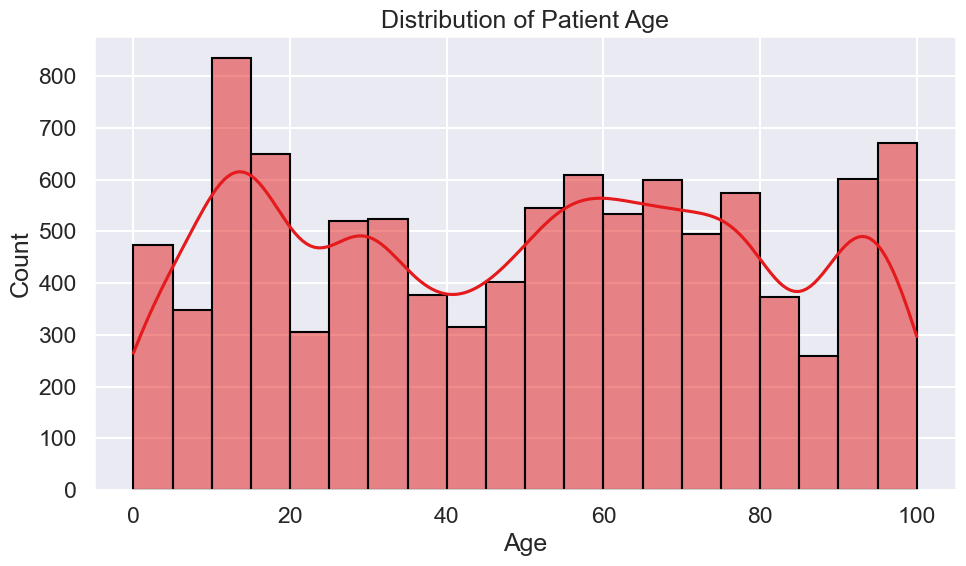

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color=palette[0], edgecolor='black')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### Distribution of Approximate Annual Income

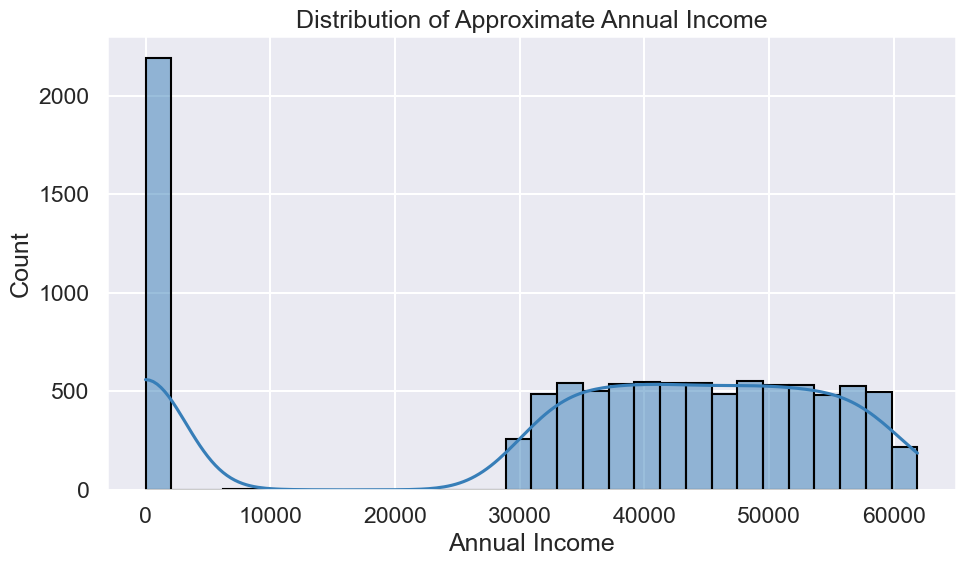

In [28]:
plt.figure(figsize=(10,6),) 
sns.histplot(df['Approximate Annual Income'], bins=30, kde=True, color=palette[1], edgecolor='black') 
plt.title('Distribution of Approximate Annual Income') 
plt.xlabel('Annual Income') 
plt.ylabel('Count') 
plt.tight_layout() 
plt.show()

##### Gender Distribution

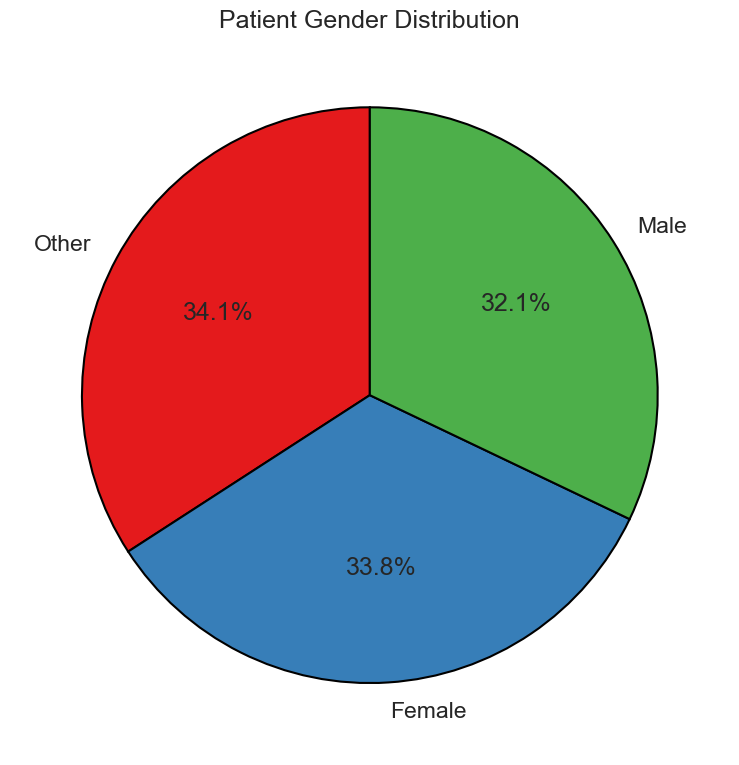

In [29]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
    colors=palette[:len(gender_counts)], startangle=90, wedgeprops={'edgecolor':'black'})
plt.title('Patient Gender Distribution')
plt.tight_layout()
plt.show()


##### Number of Visits per Department

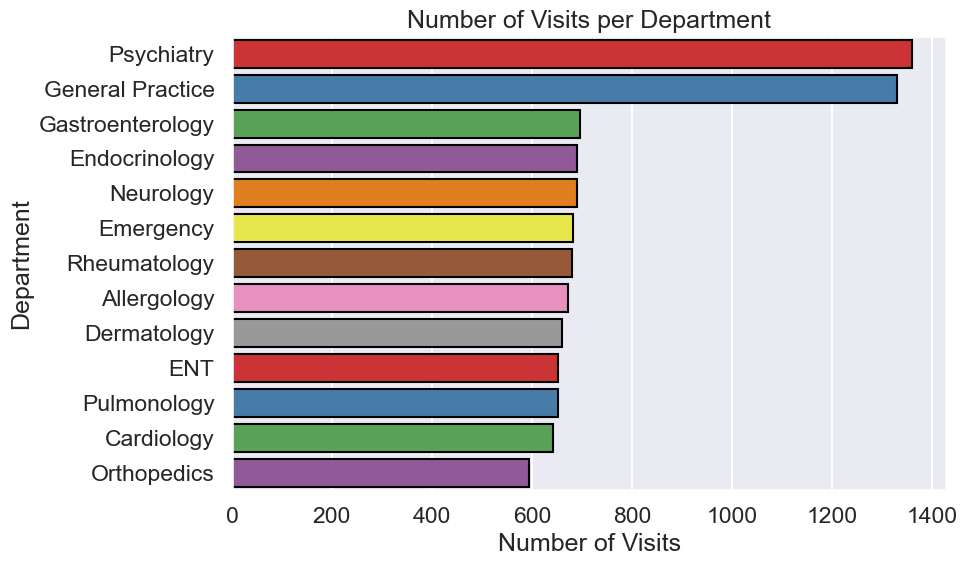

In [30]:
dept_counts = df['Department'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=dept_counts.values, y=dept_counts.index,
    palette=palette[:len(dept_counts)], edgecolor='black')
plt.title('Number of Visits per Department')
plt.xlabel('Number of Visits')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

##### Number of Visits per Age Group

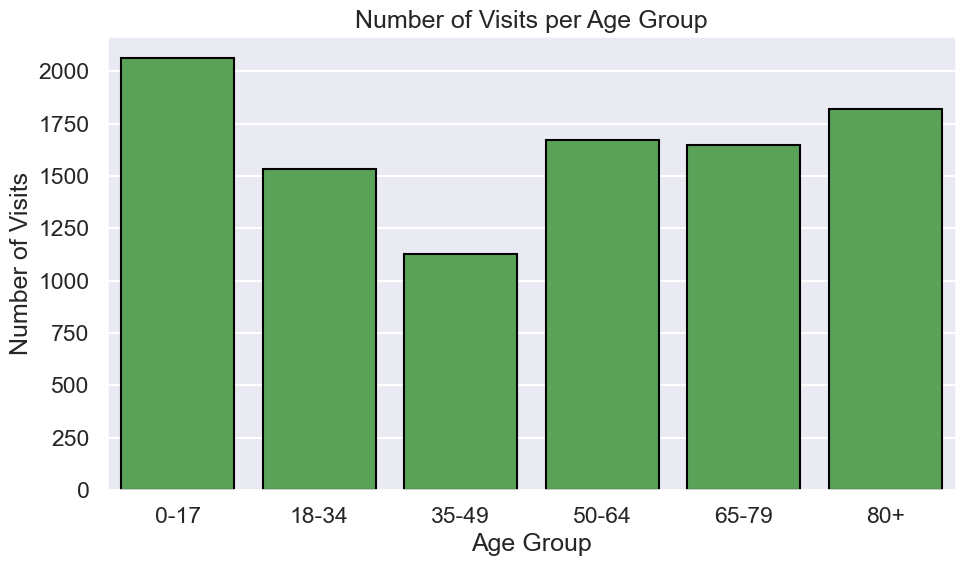

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age Group', data=df,
    order=labels, color=palette[2], edgecolor='black')
plt.title('Number of Visits per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.tight_layout()
plt.show()

##### Satisfaction Level by Department

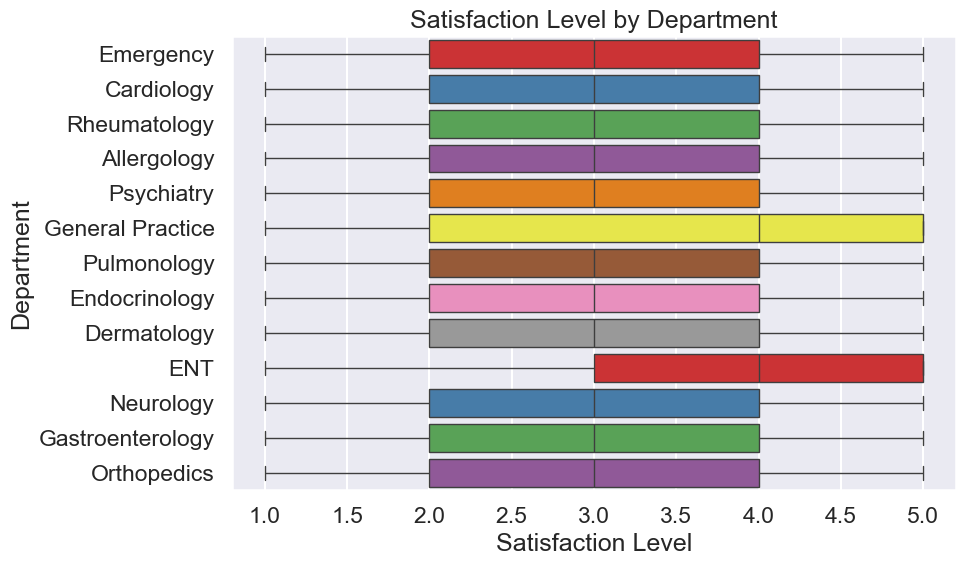

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Satisfaction Level', y='Department', data=df,
            palette=palette[:len(dept_counts)])
plt.title('Satisfaction Level by Department')
plt.xlabel('Satisfaction Level')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

##### Number of Visits Over Time

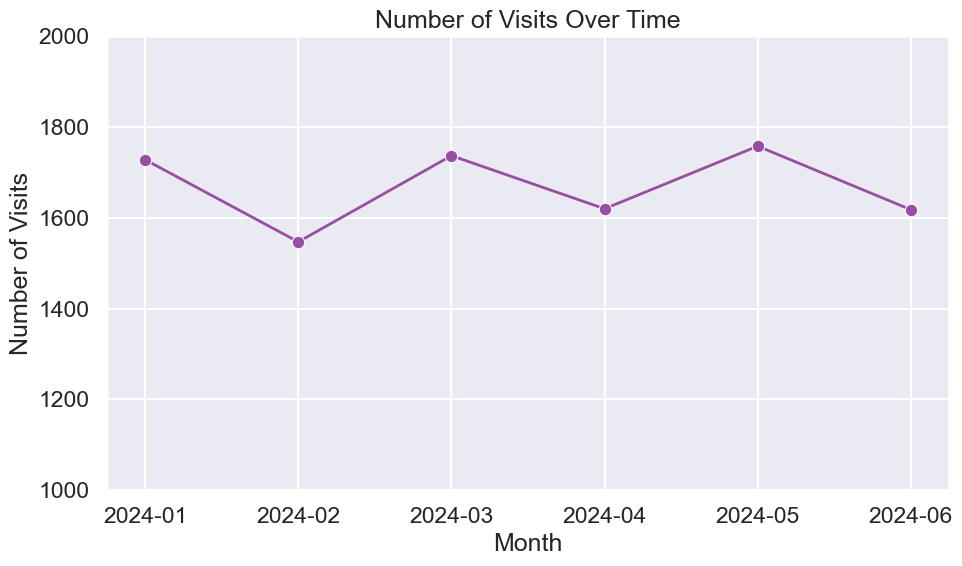

In [33]:
visits_per_month = df.groupby('Month').size()
plt.figure(figsize=(10,6))
sns.lineplot(x=visits_per_month.index.astype(str), y=visits_per_month.values,
             marker='o', color=palette[3], linewidth=2)
plt.title('Number of Visits Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.ylim(1000, 2000)
plt.tight_layout()
plt.show()

##### Satisfaction Level by Age Group

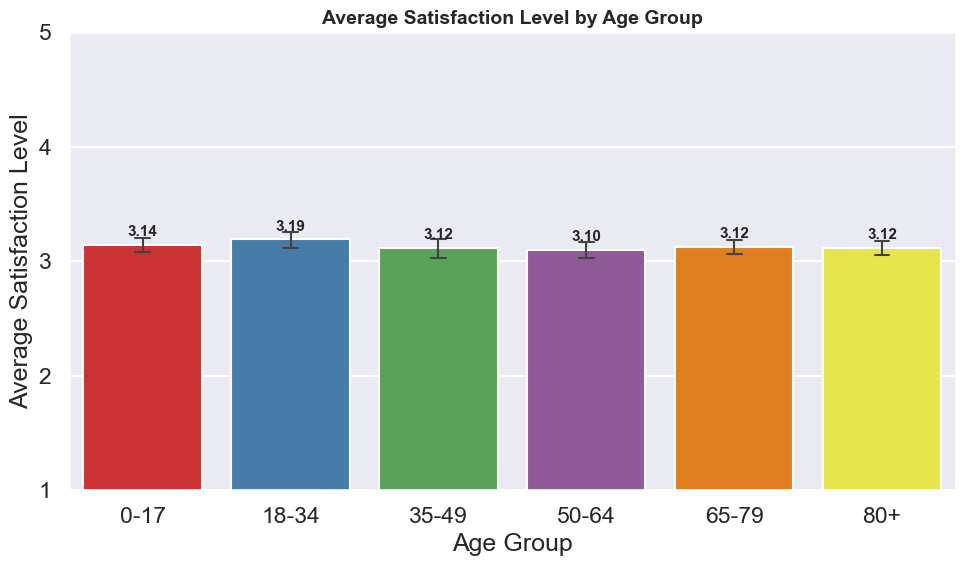

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='Satisfaction Level',
            palette=palette[:6], errorbar='ci', capsize=0.1, errwidth=1.5)

plt.title('Average Satisfaction Level by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average Satisfaction Level')
plt.ylim(1, 5)
plt.yticks([1, 2, 3, 4, 5])

ax = plt.gca()
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

##### Patient Distribution by City of Residence

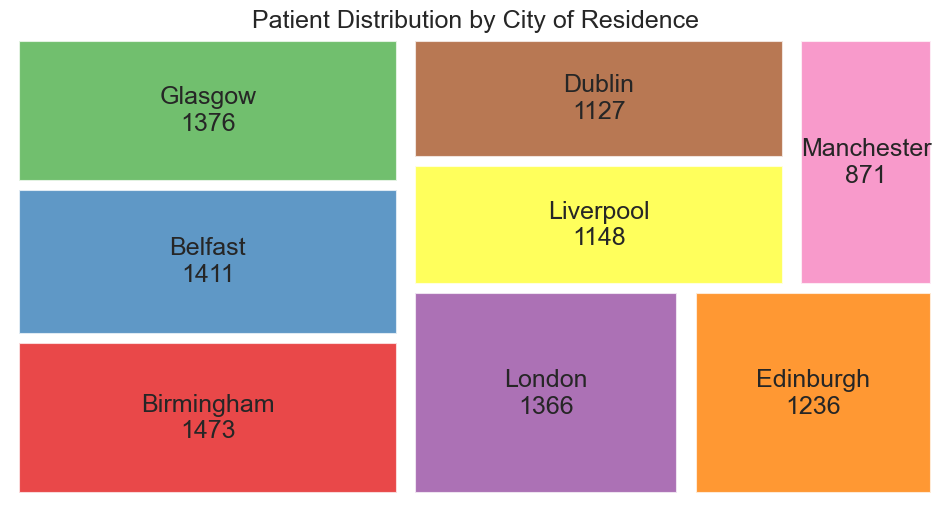

In [35]:

city_counts = df['City of Residence'].value_counts()

plt.figure(figsize=(12,6))
squarify.plot(
    sizes=city_counts.values, 
    label=[f"{city}\n{count}" for city, count in zip(city_counts.index, city_counts.values)],
    color=palette[:len(city_counts)], alpha=0.8, pad=True
)
plt.title('Patient Distribution by City of Residence')
plt.axis('off')
plt.show()


##### Number of Visits per City

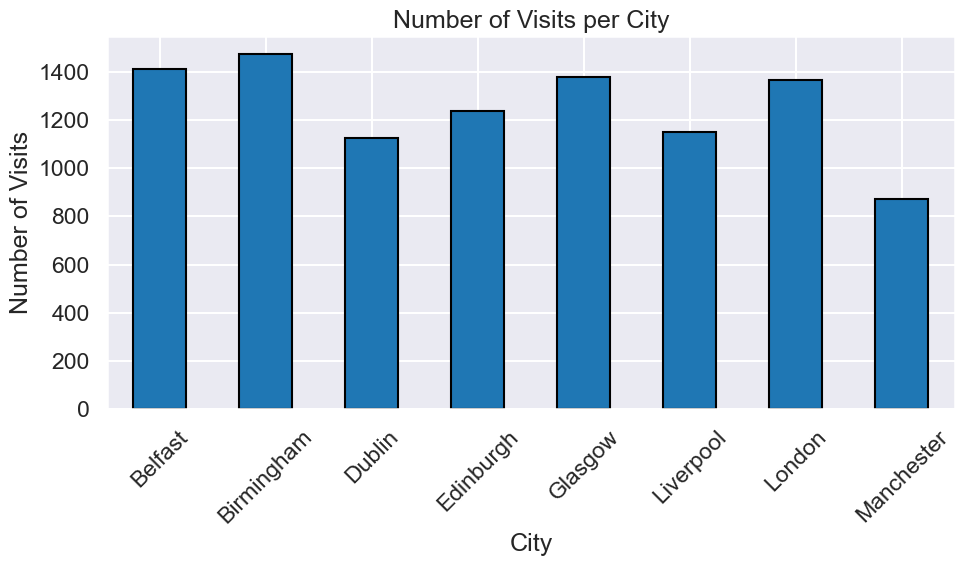

In [36]:
visits_by_city = abt.groupby("City of Residence")["Number_of_Visits"].sum()

plt.figure(figsize=(10, 6))
visits_by_city.plot(kind="bar",edgecolor='black')
plt.xlabel("City")
plt.ylabel("Number of Visits")
plt.title("Number of Visits per City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Median Number of Visits per City

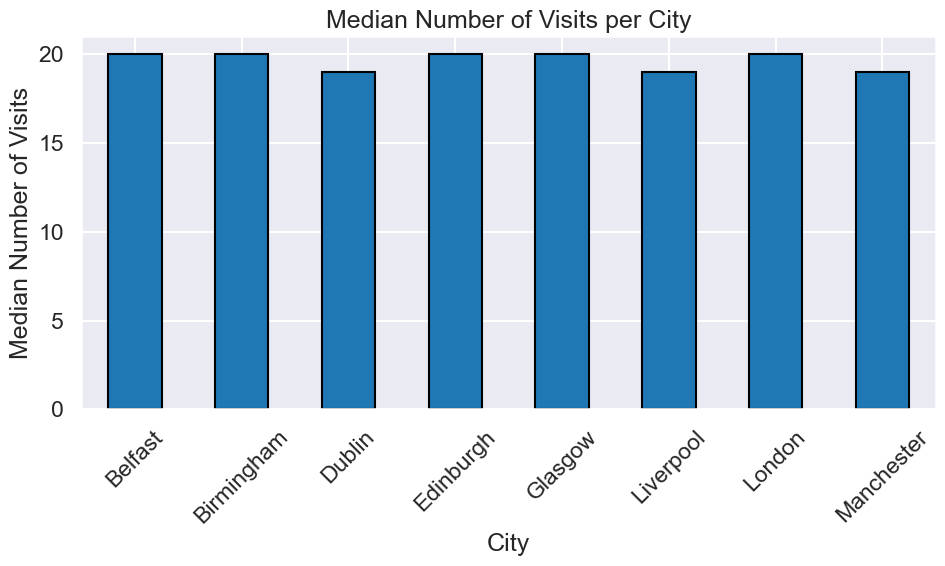

In [37]:
visits_by_city = abt.groupby("City of Residence")["Number_of_Visits"].median()


plt.figure(figsize=(10, 6))
visits_by_city.plot(kind="bar", edgecolor='black')
plt.xlabel("City")
plt.ylabel("Median Number of Visits")
plt.title("Median Number of Visits per City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Visits vs Age

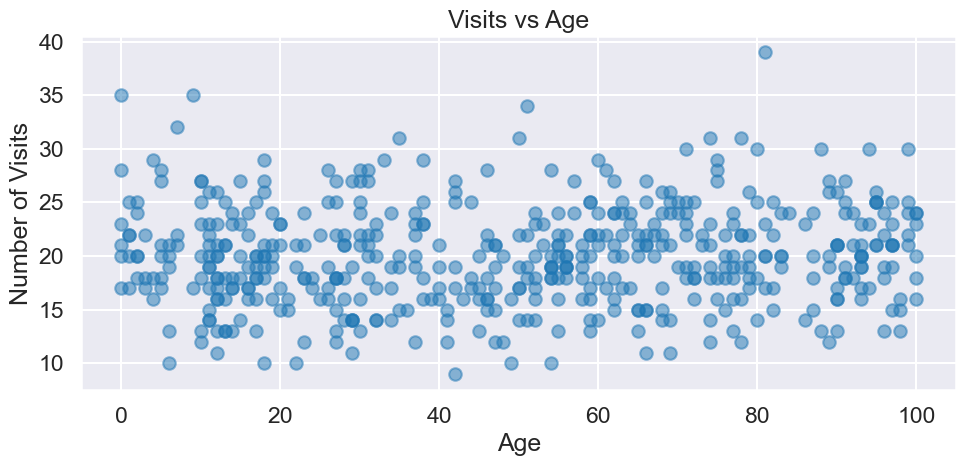

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(abt["Age"], abt["Number_of_Visits"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Number of Visits")
plt.title("Visits vs Age")
plt.tight_layout()
plt.show()

##### Annual Income vs Number of Visits

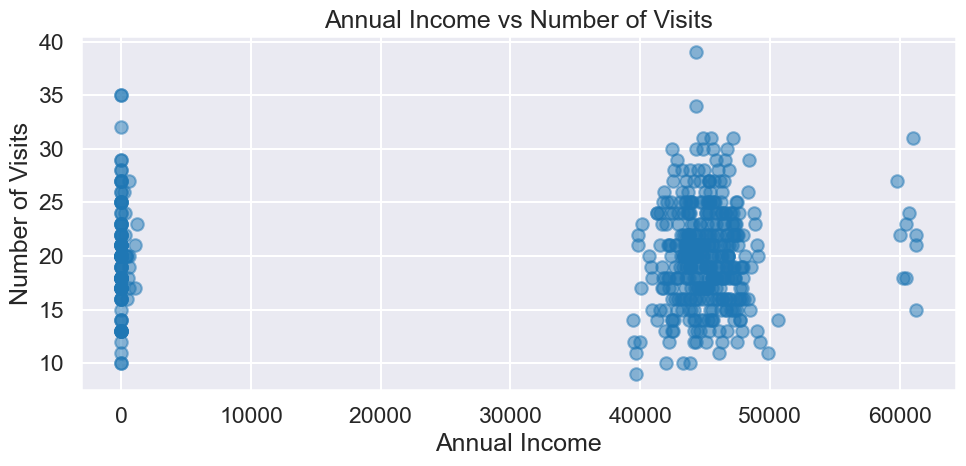

In [39]:
plt.figure(figsize=(10, 5))
plt.scatter(abt["Approximate Annual Income_mean"], abt["Number_of_Visits"], alpha=0.5)
plt.xlabel("Annual Income")
plt.ylabel("Number of Visits")
plt.title("Annual Income vs Number of Visits")
plt.tight_layout()
plt.show()

##### Correlation Heatmap (Annual income and number of visits)

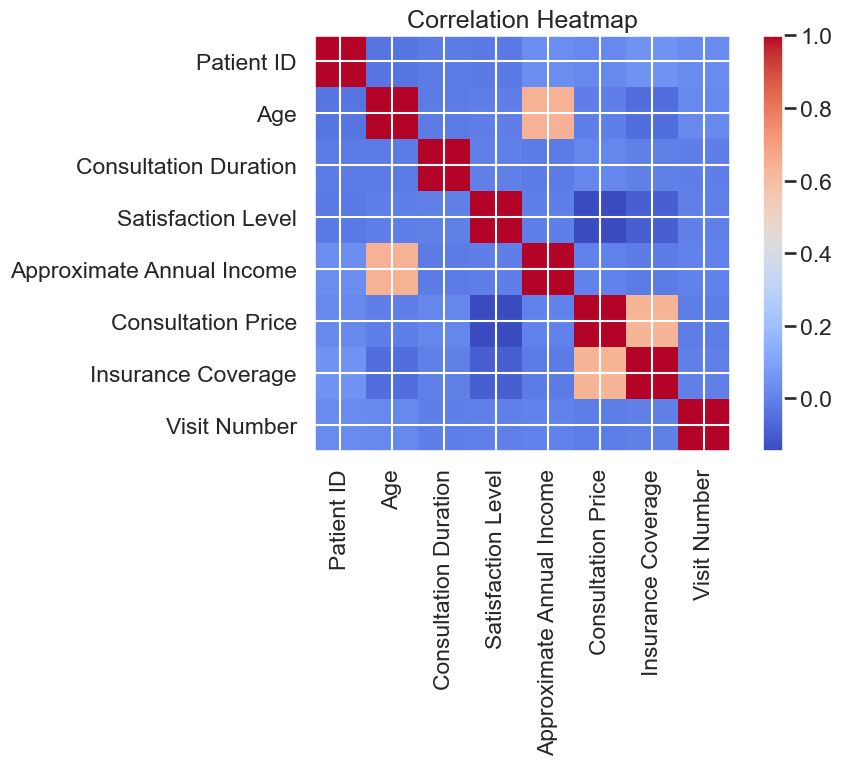

In [40]:
corr = abt["Approximate Annual Income_mean"].corr(abt["Number_of_Visits"], method="pearson")
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### Distribution of Patient Activity Duration

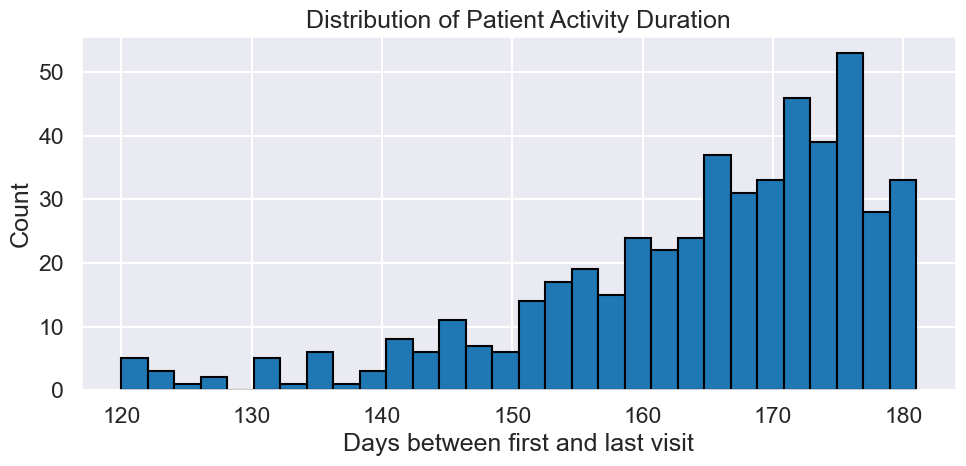

In [41]:
duration = (abt["Last_Visit_Date"] - abt["First_Visit_Date"]).dt.days

plt.figure(figsize=(10, 5))
plt.hist(duration.dropna(), bins=30, edgecolor='black')
plt.xlabel("Days between first and last visit")
plt.ylabel("Count")
plt.title("Distribution of Patient Activity Duration")
plt.tight_layout()
plt.show()

##### Activity Duration in different cities

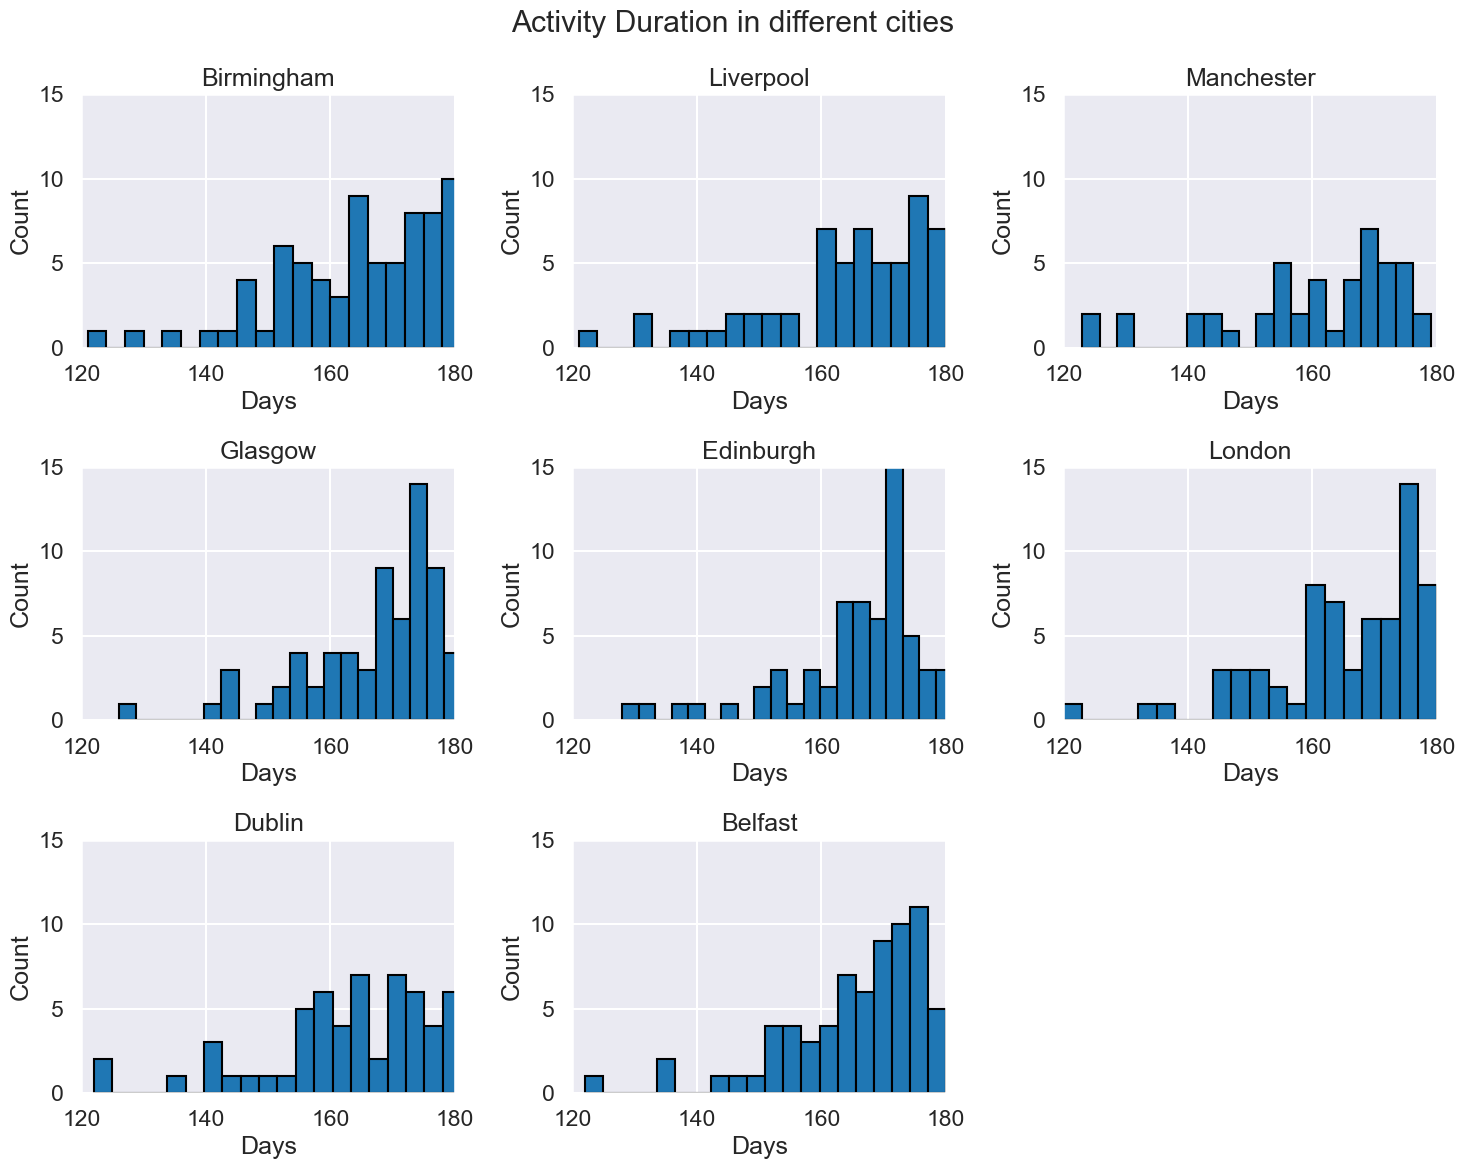

In [42]:
abt["Activity_Duration"] = (abt["Last_Visit_Date"] - abt["First_Visit_Date"]).dt.days

cities = df["City of Residence"].unique()

plt.figure(figsize=(15, 4 * ((len(cities) // 3) + 1)))
plt.suptitle('Activity Duration in different cities')

for i, city in enumerate(cities, 1):
    plt.subplot((len(cities) // 3) + 1, 3, i)
    
    subset = abt[abt["City of Residence"] == city]["Activity_Duration"].dropna()
    plt.hist(subset, bins=20,edgecolor='black')

    plt.title(city)
    plt.xlabel("Days")
    plt.ylabel("Count")

    plt.xlim(120, 180)
    plt.ylim(0, 15)

plt.tight_layout()
plt.show()

##### Avarage Coverage Percentage by Insurance Providers

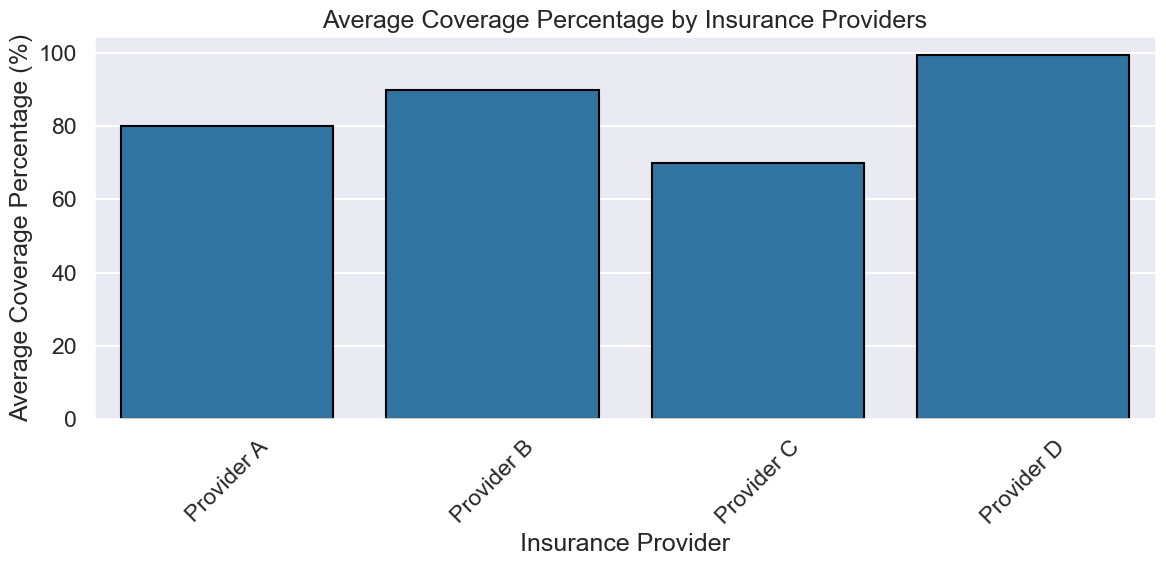

In [51]:
Coverage_Percentage = pd.DataFrame()
Coverage_Percentage['Coverage_Percentage'] = (df['Insurance Coverage'] / df['Consultation Price']) * 100
Coverage_Percentage['Insurance Provider'] = df['Insurance Provider']

# Filter out 'Missing' and 'Unknown' providers
valid_providers = Coverage_Percentage[
    ~Coverage_Percentage['Insurance Provider'].isin(['Missing', 'Unknown'])
]

coverage_avg = valid_providers.groupby('Insurance Provider')['Coverage_Percentage'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Insurance Provider', y='Coverage_Percentage', data=coverage_avg, edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Average Coverage Percentage (%)')
plt.xlabel('Insurance Provider')
plt.title('Average Coverage Percentage by Insurance Providers')
plt.tight_layout()
plt.show()